In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('./dataset/daily-minimum-temperatures-in-me.csv', parse_dates=['Date'], index_col='Date')
df.head()

,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(1)
memory usage: 57.0+ KB


In [4]:
for i in df.iloc[:,0]:
    if not re.search(r'^\d{1,}\.\d{1,}$', i, re.I):
        print(i)

?0.2
?0.8
?0.1


In [5]:
df.iloc[:,0] = df.iloc[:,0].apply(lambda x: re.sub(r'\?', '', x, re.I))

In [6]:
for i in df.iloc[:,0]:
    if not re.search(r'^\d{1,}\.\d{1,}$', i, re.I):
        print(i)

In [7]:
df.iloc[:,0] = df.iloc[:,0].astype(float)

## LINE PLOT

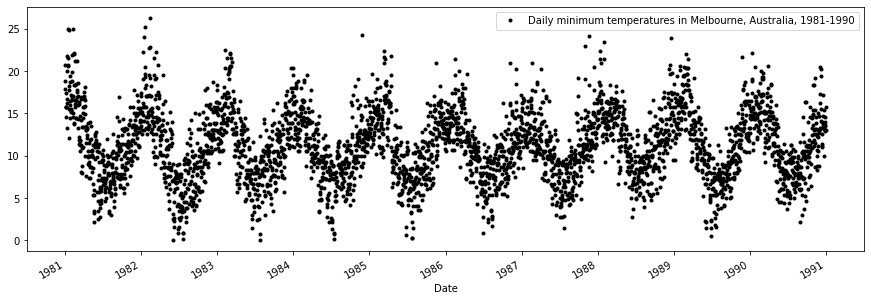

In [8]:
df.plot(figsize=(15,5), style='k.')
plt.show()

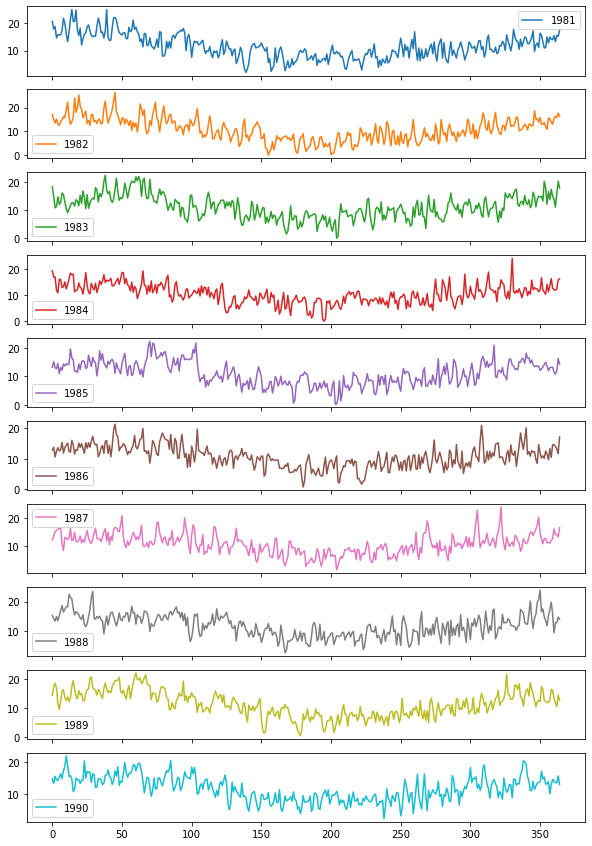

In [9]:
groups = df.resample('A')
years = pd.DataFrame()
for name, group in groups:
        years[name.year] = group.values.flatten()
years.plot(subplots=True, figsize=(10, 15))
plt.show()

Running the example creates 10 line plots, one for each year from 1981 at the top and 1990
at the bottom, where each line plot is 365 days in length.

## HISTOGRAM

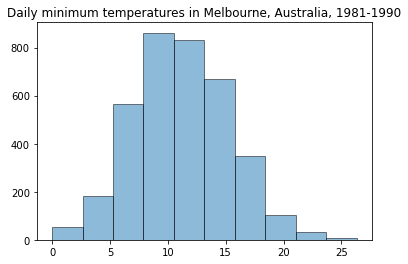

In [10]:
df.hist(edgecolor='k', grid=False, alpha=.5)
plt.show()

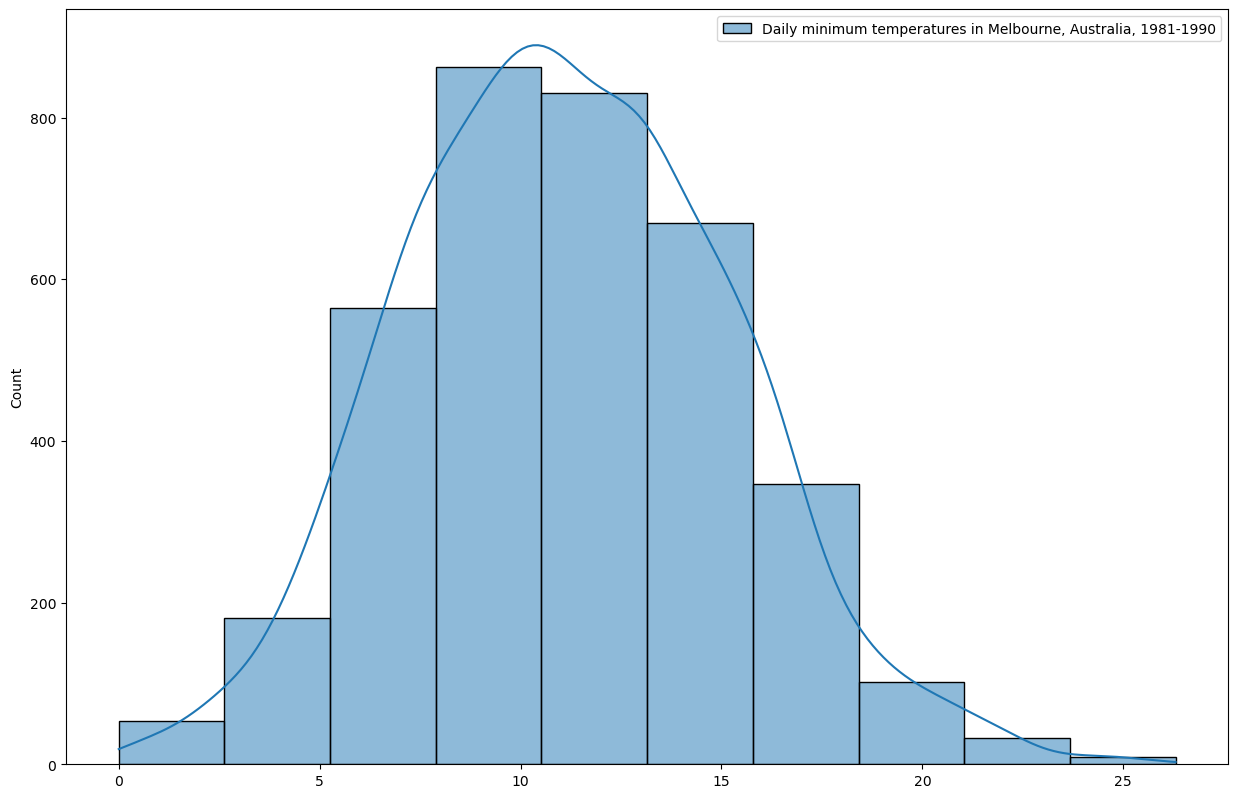

In [11]:
plt.figure(figsize=(15, 10), dpi=100)
sns.histplot(data=df, kde=True, bins=10)
plt.show()

## Box and Whisker Plots by Interval

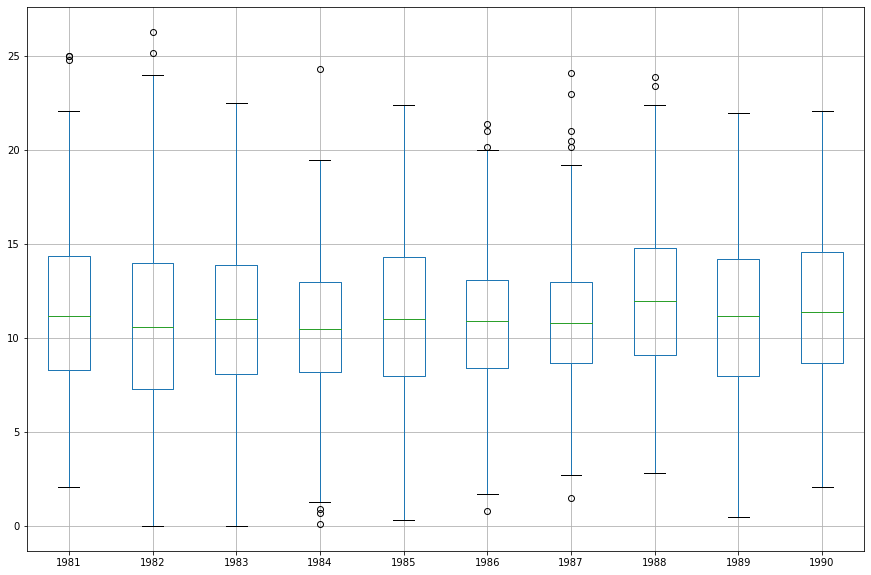

In [12]:
groups = df.resample('A')
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values.flatten()
years.boxplot(figsize=(15,10))
plt.show()

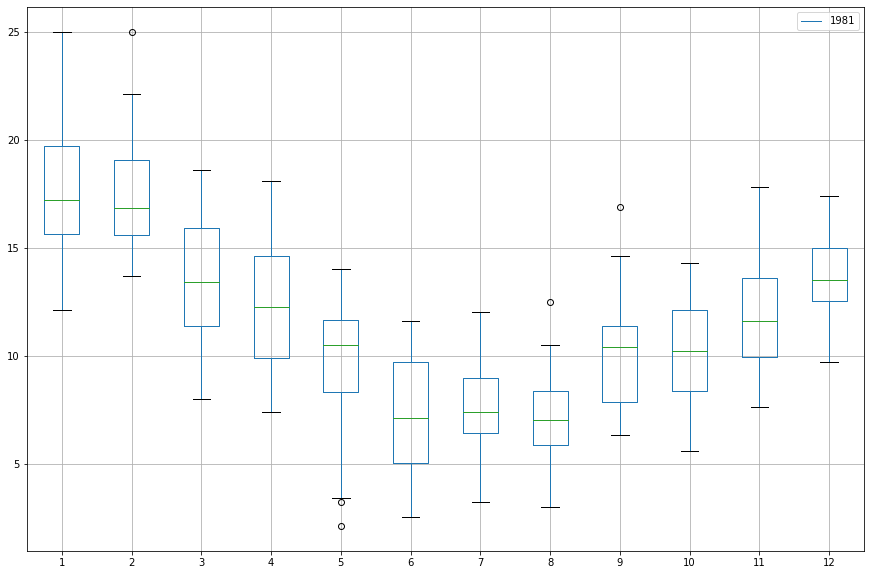

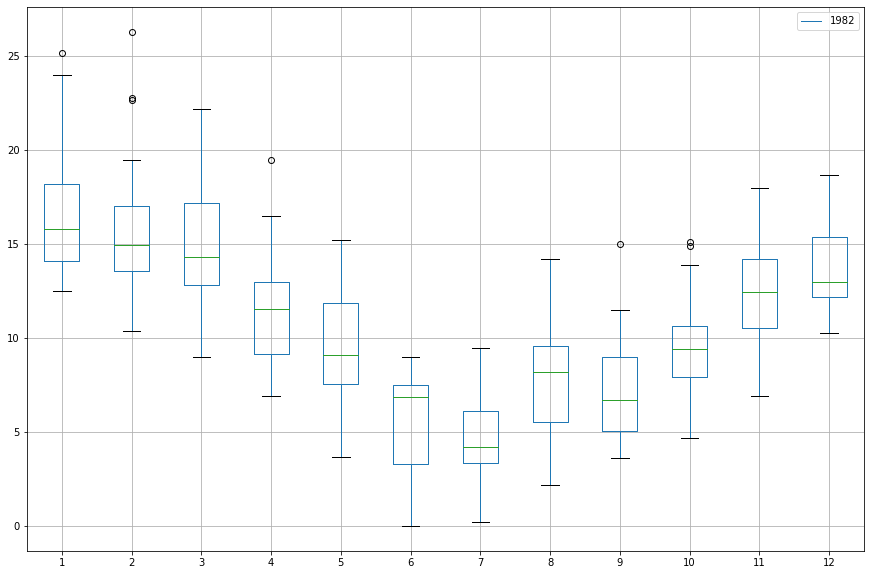

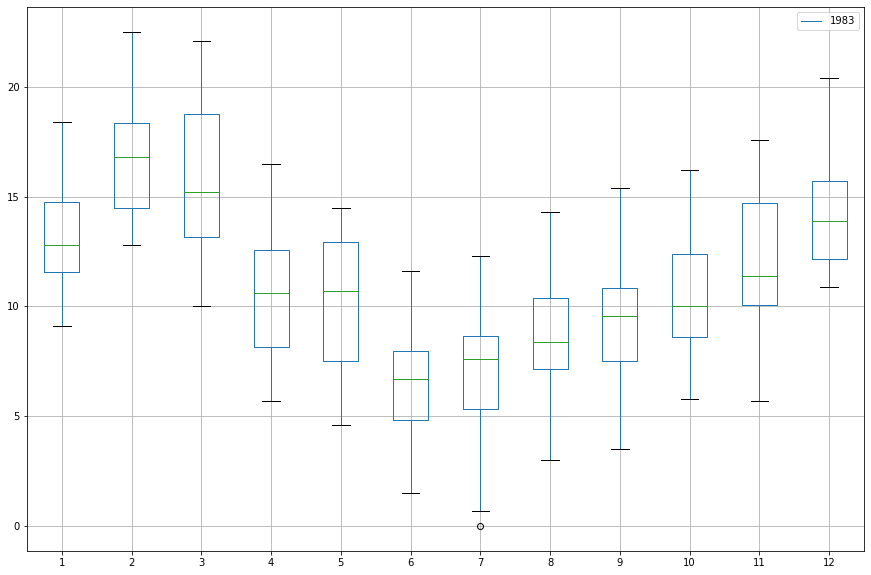

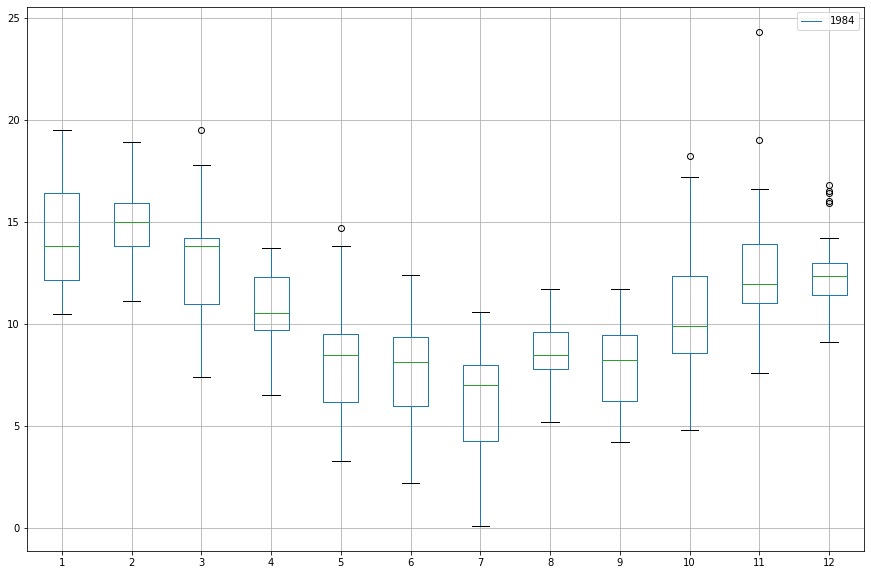

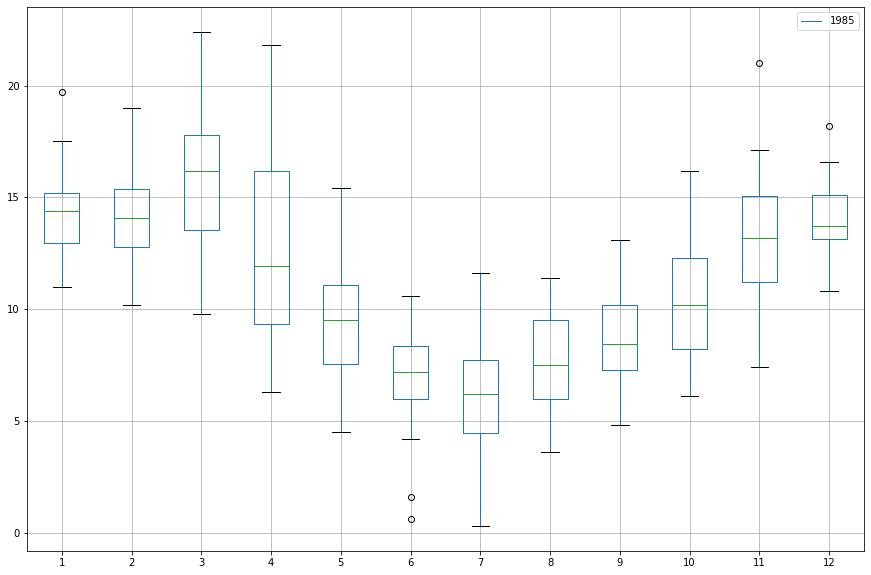

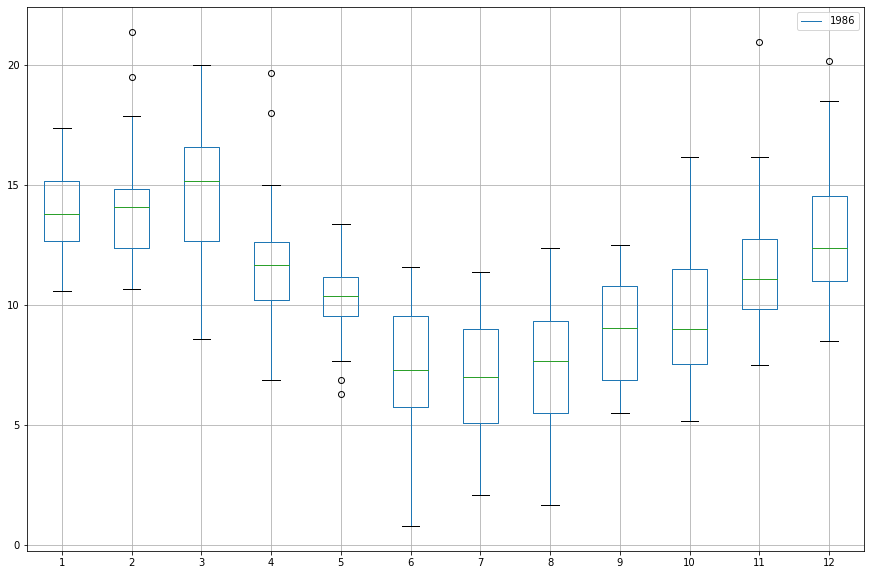

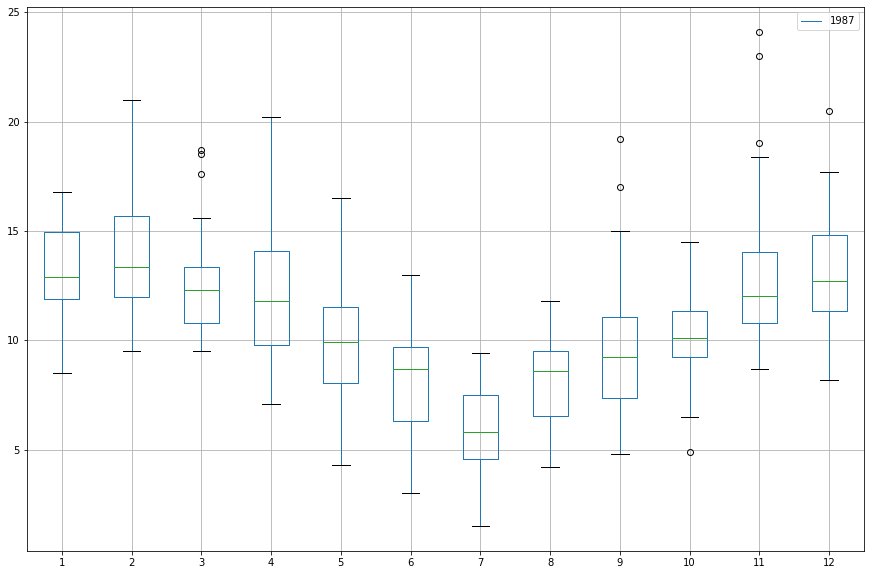

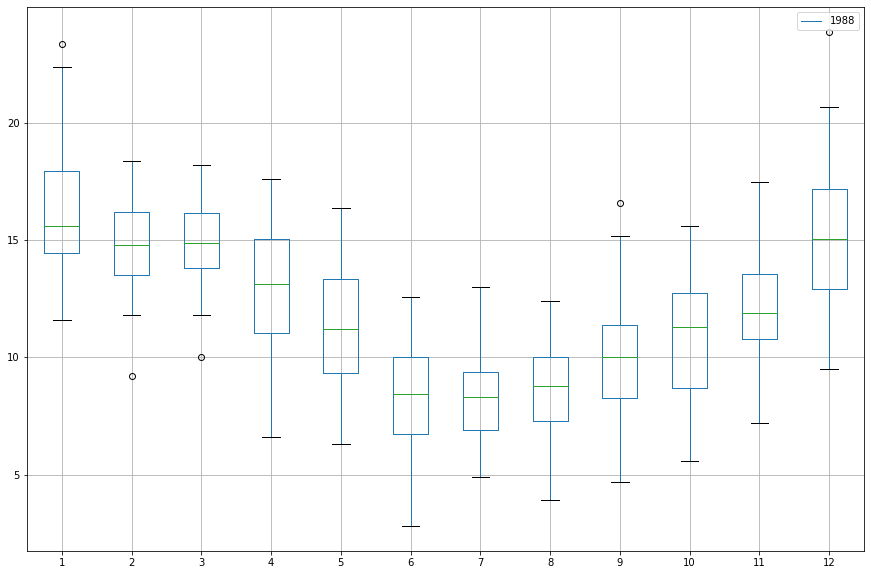

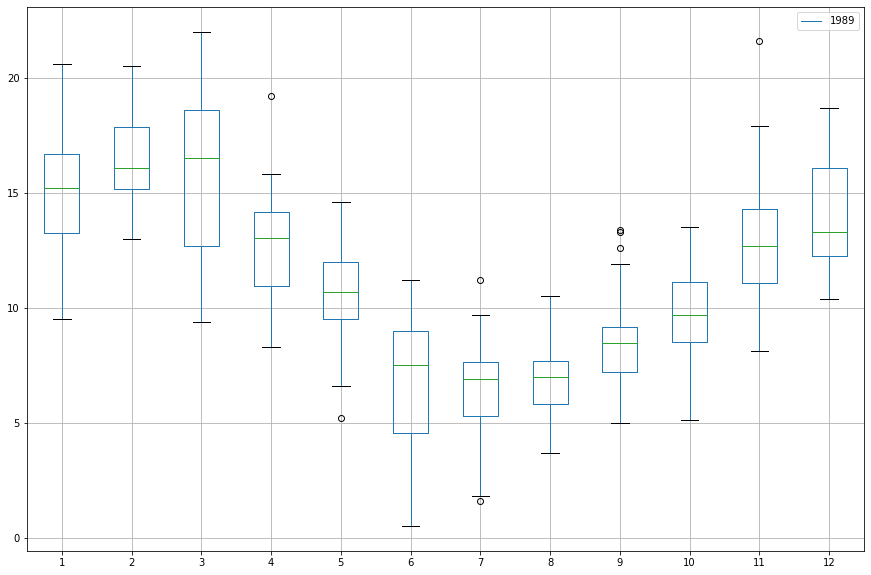

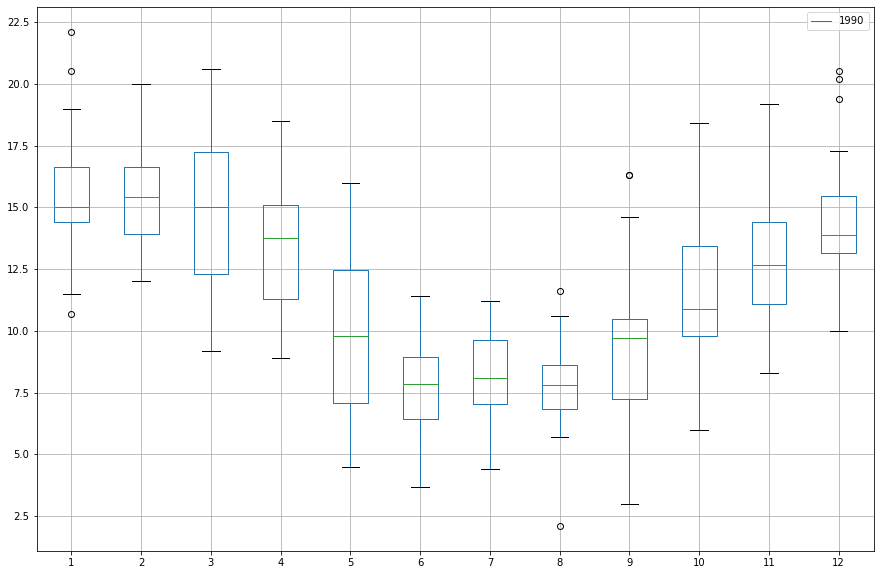

In [13]:
target_years = df.index.year.unique()

for year in target_years:
    groups = df.loc[str(year)].resample('M')
    motnhs = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis='columns')
    motnhs.columns = [name.month for name, val in groups]

    motnhs.boxplot(figsize=(15,10))
    plt.legend([str(year)])
    plt.show()

## Heat Map

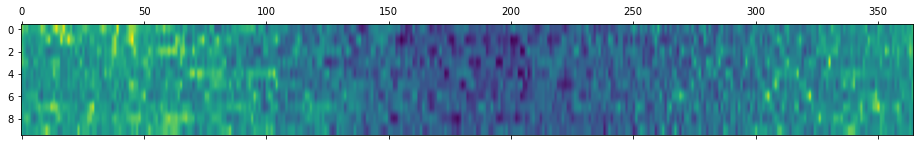

In [14]:
groups = df.resample('A')
dataframe = pd.DataFrame()

for index, val in groups:
    dataframe[index.year] = val.values.flatten()

plt.matshow(dataframe.T, interpolation=None, aspect='auto')
plt.show()

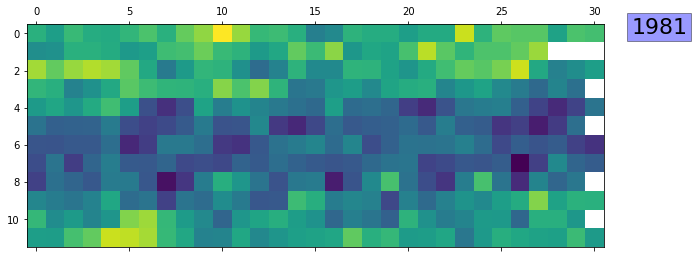

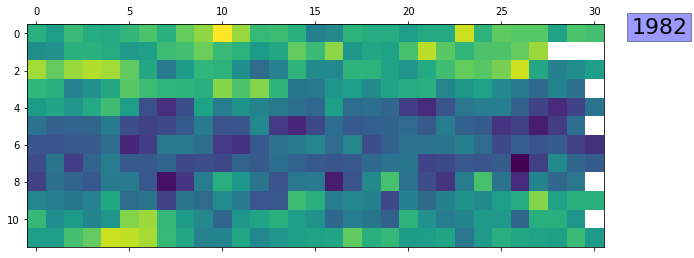

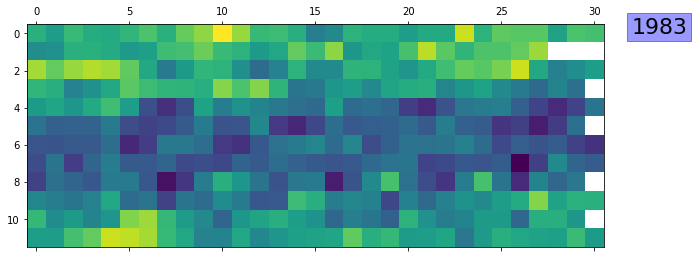

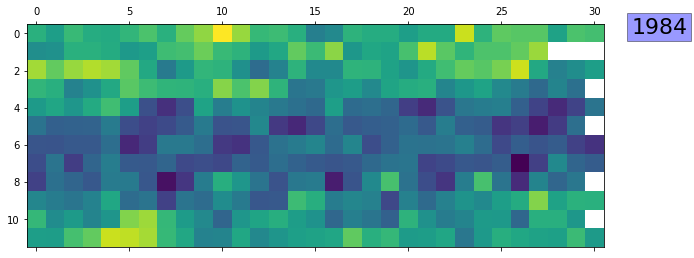

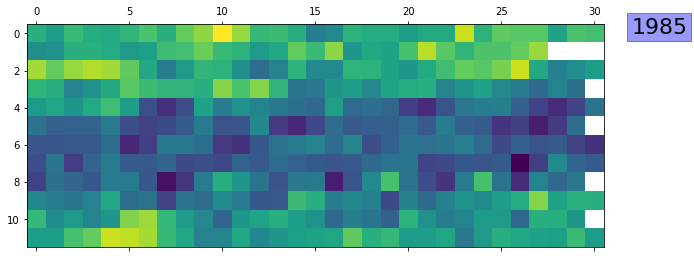

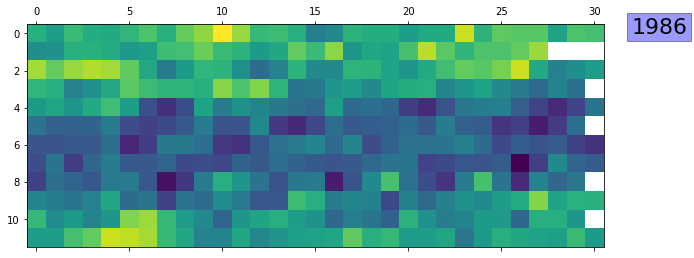

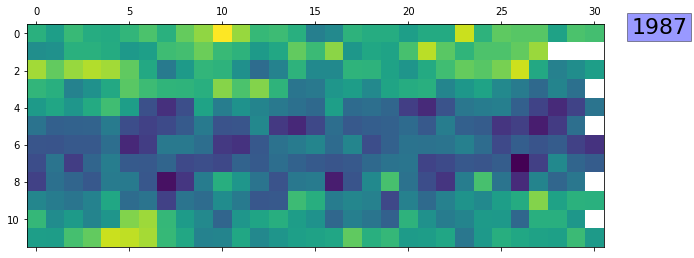

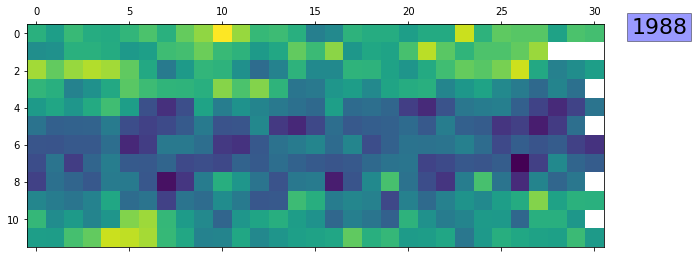

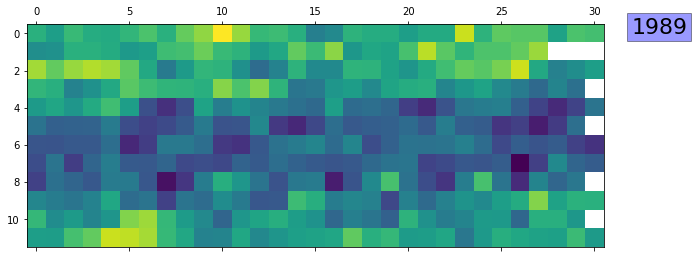

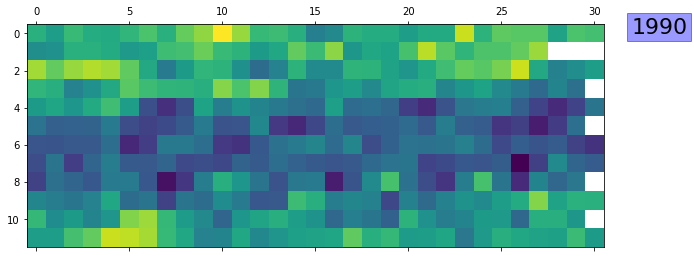

In [16]:
target_years = df.index.year.unique()

for year in target_years:    
    year_df = df.loc[str(year)]
    groups = year_df.resample('M')

    months = pd.concat([pd.DataFrame(val.values) for index, val in groups], axis='columns', keys=year_df.index.month.unique())

    plt.matshow(motnhs.T, interpolation=None, aspect='auto')
    plt.text(32, 0, year, fontsize = 22, bbox=dict(facecolor='blue', alpha=0.4, edgecolor='black'))
    plt.show()

## LAG SCATTER PLOT

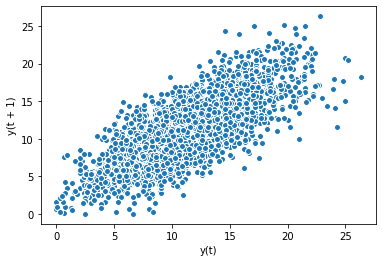

In [22]:
pd.plotting.lag_plot(df, edgecolor='white')
plt.show()

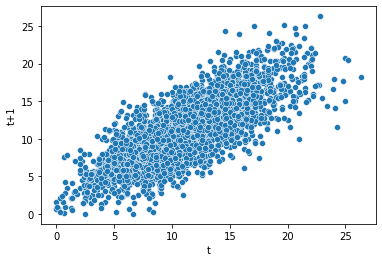

,t+1,t
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6


In [41]:
new_df = df.copy(deep=True)
new_df['t'] = new_df.shift(1)
new_df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'t+1'}, inplace=True)

sns.scatterplot(x='t', y='t+1', data=new_df)
plt.show()
display(new_df.head())

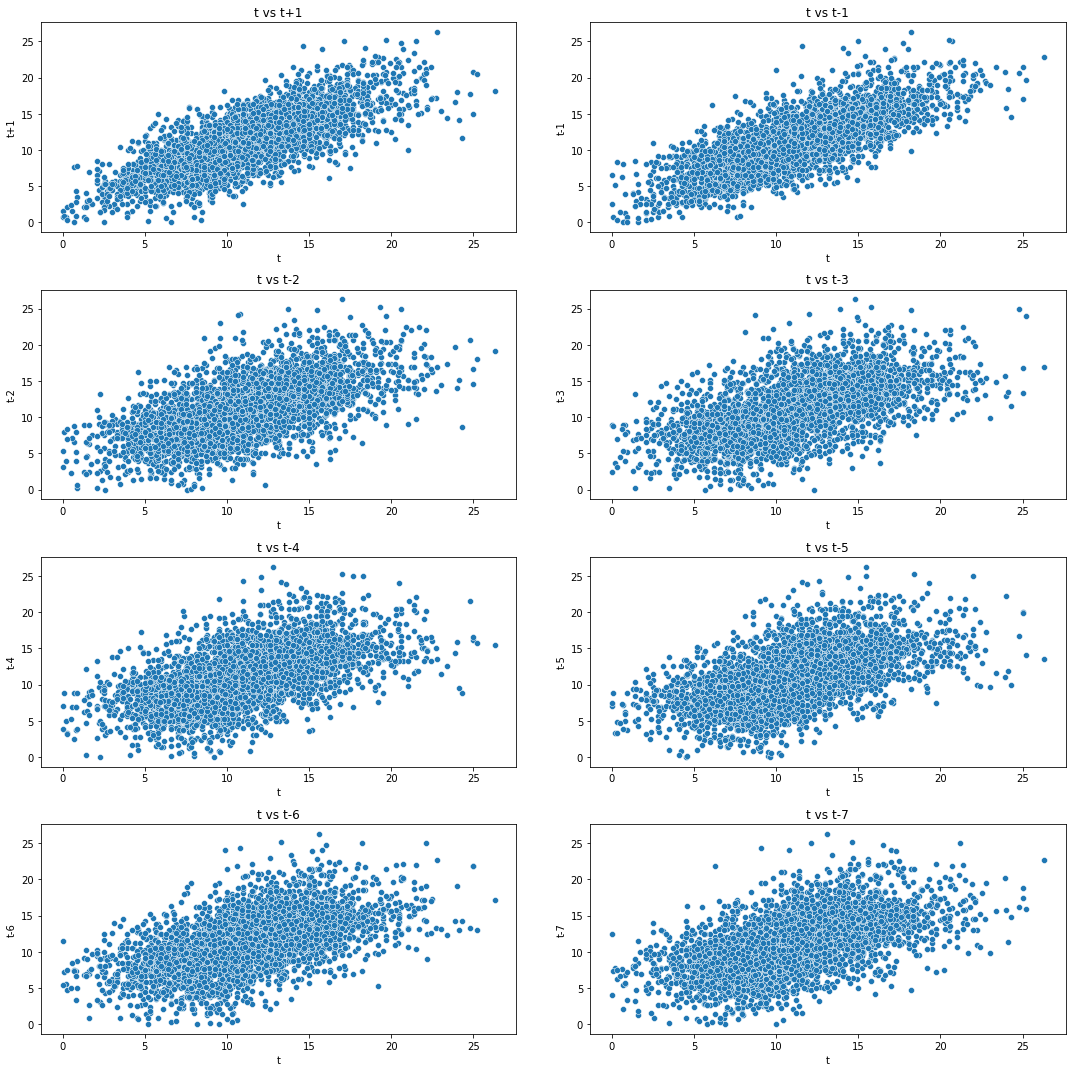

In [119]:
lags = 7
new_df = pd.DataFrame({f't+1' if i == 0 else f't' if i == 1 else f't-{i-1}':df.iloc[:, 0].shift(i).values for i in range(lags+2)})

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15,15))
for i in range(4*2):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x='t', y=[col for col in new_df.columns if col != 't'][i], data=new_df)
    plt.gca().set_title(f"t vs {[col for col in new_df.columns if col != 't'][i]}")

fig.tight_layout(w_pad=4)
# plt.subplots_adjust(top=1.5)
plt.show()

## Autocorrelation Plots

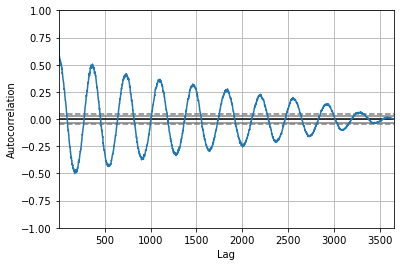

In [108]:
pd.plotting.autocorrelation_plot(df)
plt.show()